In [1]:
# !pip uninstall mom-builder -y

Found existing installation: mom_builder 0.1.0
Uninstalling mom_builder-0.1.0:
  Successfully uninstalled mom_builder-0.1.0


In [2]:
# %pip install git+https://github.com/hombit/mom-builder

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/hombit/mom-builder to /tmp/pip-req-build-lhqoh56t
  Running command git clone --filter=blob:none --quiet https://github.com/hombit/mom-builder /tmp/pip-req-build-lhqoh56t
  Resolved https://github.com/hombit/mom-builder to commit d0dbfcc1c0f8be83f6a42062dd31fe29507b30a2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mom_builder: filename=mom_builder-0.1.0-cp39-abi3-linux_x86_64.whl size=948775 sha256=fd31431c2519667734386e550dd6fa78ca43b042f1a311998b1a6e69cf346192
  Stored in directory: /tmp/pip-ephem-wheel-cache-7xtlm68b/wheels/45/66/10/6a3c0be41cc54044775558528683276cfd38284f9a31dad9c1
Successfully built mom_builder
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Standard library imports
import os
# Set to the maximum number of threads you want to allow
os.environ["NUMEXPR_MAX_THREADS"] = "4"

# Third-party imports
import numpy as np
import pandas as pd
import dask
from dask.distributed import Client
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import astropy.units as u
from astropy.coordinates import SkyCoord, Angle
import warnings
from upath import UPath

# Local library-specific imports
import lsdb
from lsdb.core.search import ConeSearch

# Jupyter-specific settings and magic commands
%matplotlib inline

# Configuration settings
warnings.simplefilter("ignore")
logging.getLogger("numexpr.utils").setLevel(logging.WARNING)
logging.getLogger("distributed").setLevel(logging.WARNING)
rcParams["savefig.dpi"] = 550
rcParams["font.size"] = 20
plt.rc("font", family="serif")
mpl.rcParams["axes.linewidth"] = 2
dask.config.set({"dataframe.convert-string": False})

print(f"Version of lsdb is {lsdb.__version__}")

Version of lsdb is 0.6.4


In [2]:
client = Client(n_workers=4, threads_per_worker=1, memory_limit="4GiB")
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40773,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:44547,Total threads: 1
Dashboard: http://127.0.0.1:43091/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:34057,


In [3]:
base_path = UPath("/rubin/lsdb_data")
object_cat = lsdb.open_catalog(base_path / "object_collection", columns=['coord_ra','coord_dec','i_hsmShapeRegauss_e1','i_hsmShapeRegauss_e2','i_hsmShapeRegauss_flag','i_hsmShapeRegauss_sigma','i_cModel_flag','i_cModel_flag_apCorr','i_cModelFlux','i_cModelFluxErr','i_sizeExtendedness','i_inputCount'])
# object_cat = lsdb.open_catalog(base_path / "object_collection")
object_cat.columns

Index(['coord_ra', 'coord_dec', 'i_hsmShapeRegauss_e1', 'i_hsmShapeRegauss_e2',
       'i_hsmShapeRegauss_flag', 'i_hsmShapeRegauss_sigma', 'i_cModel_flag',
       'i_cModel_flag_apCorr', 'i_cModelFlux', 'i_cModelFluxErr',
       'i_sizeExtendedness', 'i_inputCount'],
      dtype='object')

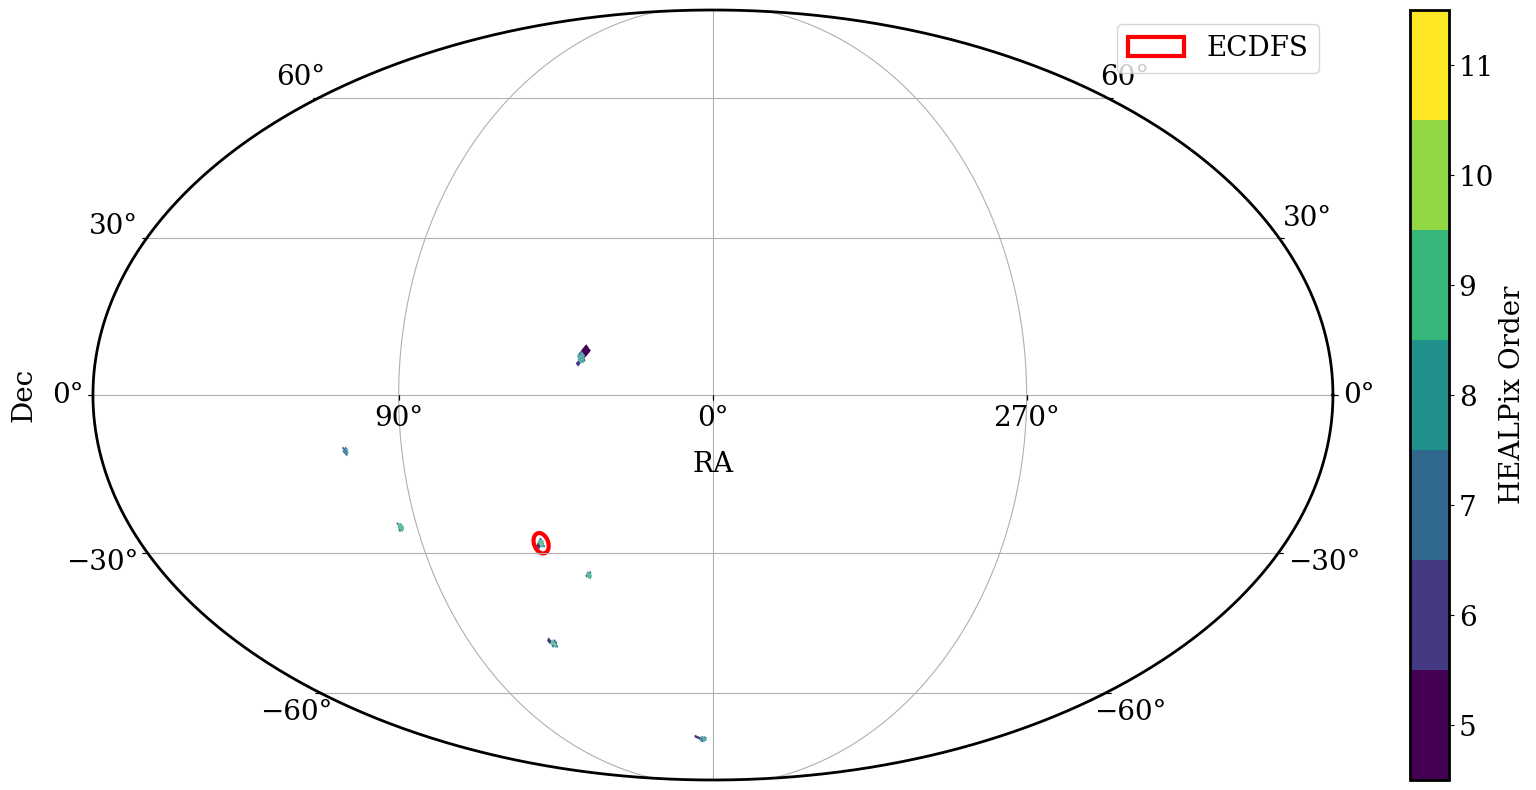

In [4]:
fields = {
    "ECDFS": (53.13, -28.10),  # Extended Chandra Deep Field South
    "EDFS": (59.10, -48.73),  # Euclid Deep Field South
    "Rubin_SV_38_7": (37.86, 6.98),  # Low Ecliptic Latitude Field
    "Rubin_SV_95_-25": (95.00, -25.00),  # Low Galactic Latitude Field
    "47_Tuc": (6.02, -72.08),  # 47 Tuc Globular Cluster
    "Fornax_dSph": (40.00, -34.45)  # Fornax Dwarf Spheroidal Galaxy
}

# Define a 2-degree (2*3600 arcseconds) search radius
radius_arcsec = 2 * 3600  # Convert 2 degree to arcseconds
# Create six cone searches
cones = {name: ConeSearch(ra=ra, dec=dec, radius_arcsec=radius_arcsec) for name, (ra, dec) in fields.items()}
ecdfs_cone = cones['ECDFS']
fig = plt.figure(figsize=(20, 10))
# Plot the pixel density map for the DP1 object
_, ax = object_cat.plot_pixels(fig=fig)
ecdfs_cone.plot(ec='red', facecolor="none", label='ECDFS', linewidth=3, linestyle='solid')
plt.legend(loc="upper right")
plt.show()

In [5]:
ecdfs_cat = object_cat.search(ecdfs_cone)
ecdfs_cat = ecdfs_cat[ecdfs_cat['i_sizeExtendedness'] > 0.5] 
ecdfs_cat

""
npartitions=94
"Order: 9, Pixel: 2299711"
"Order: 6, Pixel: 35933"
...
"Order: 8, Pixel: 575315"
"Order: 7, Pixel: 143829"


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog pixel map - object_lc'}>)

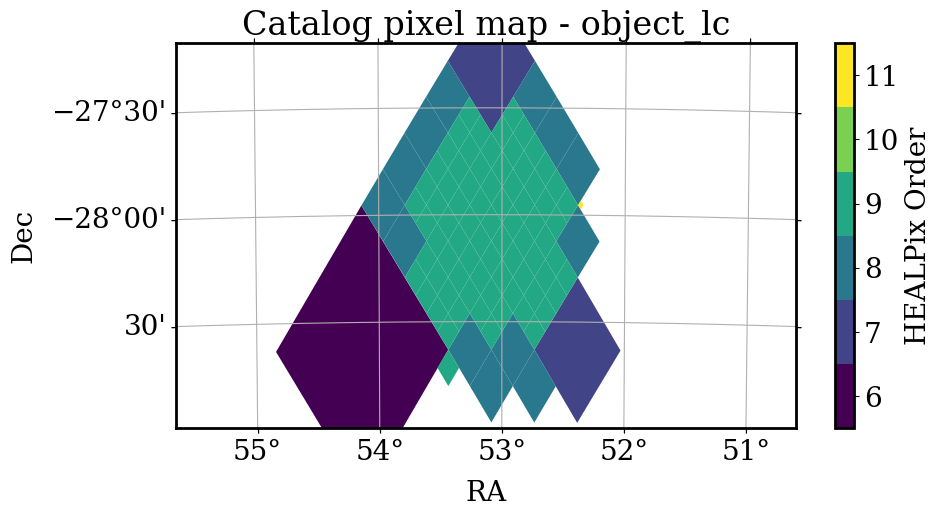

In [6]:
ecdfs_cat.plot_pixels(center=SkyCoord(ra=53.13*u.deg,dec= -28.10*u.deg),fov=2 * 3600*u.arcsec)

In [69]:
import dask
from hats.pixel_math import spatial_index_to_healpix
from dask.delayed import Delayed, delayed
from hats import HealpixPixel
from lsdb import Catalog
import nested_pandas as npd
import numpy as np

import hats.pixel_math.healpix_shim as hp

from mom_builder import MOMMerger, MOMBuilder
## custom function
def build_subtree(max_order, split_order, pixel_index, values):
    avg_val = np.sum(values)
    merger = MOMMerger("value", "sum-poisson-chi2", dtype=np.dtype(np.int32), threshold = .01)
    builder = MOMBuilder(merger, max_norder=11, split_norder=split_order, thread_safe=True)
    values = np.array(values, dtype=np.int32)
    out = builder.build_subtree(pixel_index, values)
    if out == []:
        return [(split_order, np.array([pixel_index]), np.array([avg_val]))]
    return out

@delayed
def perform_inner_skymap(
        partition: npd.NestedFrame,
        func,
        pixel: HealpixPixel,
        target_order: int,
        default_value = 0,
        **kwargs,
) -> np.ndarray:
    """Splits a partition into pixels at a target order and performs a given function on the new pixels"""
    delta_order = target_order - pixel.order
    img = np.full(1 << 2 * delta_order, fill_value=default_value)

    if len(partition) == 0:
        subtree = build_subtree(11, pixel.order, pixel.pixel, img)
        return img, subtree

    spatial_index = partition.index.to_numpy()
    order_pixels = spatial_index_to_healpix(spatial_index, target_order=target_order)

    def apply_func(df):
        # gets the healpix pixel of the partition using the spatial index
        p = spatial_index_to_healpix([df.index.to_numpy()[0]], target_order=target_order)[0]
        return func(df, HealpixPixel(target_order, p), **kwargs)

    gb = partition.groupby(order_pixels, sort=False).apply(apply_func)
    min_pixel_value = pixel.pixel << 2 * delta_order
    img[gb.index.to_numpy() - min_pixel_value] = gb.to_numpy(na_value=default_value)
    subtree = build_subtree(11, pixel.order, pixel.pixel, img)
    return img, subtree

def compute_skymap(
        pixel_map, order: int | None = None, default_value = 0.0
) -> np.ndarray:
    """Returns a histogram map of healpix_pixels to values.
    Args:
        pixel_map(Dict[HealpixPixel, Any]): A dictionary of healpix pixels and their values
        order (int): The order to make the histogram at (default None, uses max order in pixel_map)
        default_value: The value to use at pixels that aren't covered by the pixel_map (default 0)
    """

    pixels = list(pixel_map.keys())
    if len(pixels) == 0:
        npix = hp.order2npix(order) if order is not None else hp.order2npix(0)
        return np.full(npix, default_value)
    hp_orders = np.vectorize(lambda x: x.order)(pixels)
    hp_pixels = np.vectorize(lambda x: x.pixel)(pixels)
    if order is None:
        order = np.max(hp_orders)
    npix = hp.order2npix(order)
    img = np.full(npix, default_value)
    dorders = order - hp_orders
    values = [pixel_map[x] for x in pixels]
    starts = hp_pixels << (2 * dorders)
    ends = (hp_pixels + 1) << (2 * dorders)

    def set_values(start, end, value):
        if value is not None:
            img[np.arange(start, end)] = value

    for s, e, v in zip(starts, ends, values):
        set_values(s, e, v)

    return img

def skymap_data(
        catalog: Catalog,
        func,
        order: int | None = None,
        default_value = 0.0,
        **kwargs,
) -> dict[HealpixPixel, Delayed]:
    """Perform a function on each partition of the catalog, returning a dict of values for each pixel.
    Args:
        func (Callable[[npd.NestedFrame, HealpixPixel], Any]): A function that takes a pandas
            DataFrame with the data in a partition, the HealpixPixel of the partition, and any other
            keyword arguments and returns an aggregated value
        order (int | None): The HEALPix order to compute the skymap at. If None (default),
            will compute for each partition in the catalog at their own orders. If a value
            other than None, each partition will be grouped by pixel number at the order
            specified and the function will be applied to each group.
        default_value (Any): The value to use at pixels that aren't covered by the catalog (default 0)
        **kwargs: Arguments to pass to the function
    Returns:
        A dict of Delayed values, one for the function applied to each partition of the catalog.
        If order is not None, the Delayed objects will be numpy arrays with all pixels within the
        partition at the specified order. Any pixels within a partition that have no coverage will
        have the default_value as its result, as well as any pixels for which the aggregate
        function returns None.
    """
    results = {}
    partitions = catalog.to_delayed()
    if order is None:
        results = {
            pixel: delayed(func)(partitions[index], pixel, **kwargs)
            for pixel, index in catalog._ddf_pixel_map.items()
        }
    elif len(catalog.hc_structure.pixel_tree) > 0:
        if order < catalog.hc_structure.pixel_tree.get_max_depth():
            raise ValueError(
                f"order must be greater than or equal to max order in catalog "
                f"({catalog.hc_structure.pixel_tree.get_max_depth()})"
            )
        results = {}
        subtrees = []
        for pixel, index in catalog._ddf_pixel_map.items():
            temp = perform_inner_skymap(partitions[index], func, pixel, order, default_value, **kwargs)
            results[pixel] = temp
        # results = { #change to work with tuple
        #     pixel: perform_inner_skymap(partitions[index], func, pixel, order, default_value, **kwargs)
        #     for pixel, index in catalog._ddf_pixel_map.items()
        # }
    return results

def produce_subtree_skymap(subtree):
    unit = u.arcsec * u.arcsec
    order = []
    pixel = []
    value = []
    for i in range(len(subtree)):
        for k in range(len(subtree[i])):
            torder = subtree[i][k][0]
            tpixels = subtree[i][k][1]
            tvalues = subtree[i][k][2]
            for j in range(len(tpixels)):
                order.append(np.int64(torder))
                pixel.append(np.int64(tpixels[j]))
                value.append(tvalues[j])

    value = np.array(value) / hp.order2pixarea(np.array(order), unit=unit)
    df = {"Value": value, "Order": np.array(order),
          "_healpix_29": np.left_shift(np.asarray(pixel, dtype=np.uint64), 2 * np.asarray(29 - np.array(order), dtype=np.uint64))}
    df = pd.DataFrame(df)
    df = df.sort_values(by='_healpix_29')
    temp = [0.0, 29, df.iloc[-1]['_healpix_29'] + 4 ** (29- df.iloc[-1]['Order'])]
    if temp[-1] < 12*4**29:
        df = pd.concat([df, pd.DataFrame({"Value":[temp[0]],'Order':[temp[1]], '_healpix_29': np.asarray(temp[2], dtype=np.uint64)})])
    df = df.drop('Order', axis=1)
    df = df.set_index('_healpix_29')
        
    return value, np.array(order), np.array(pixel), df

def skymap_histogram(
        catalog: Catalog,
        func,
        order: int | None = None,
        default_value = 0.0,
        **kwargs,
) -> np.ndarray:
    """Get a histogram with the result of a given function applied to the points in each HEALPix pixel of
    a given order
    Args:
        func (Callable[[npd.NestedFrame, HealpixPixel], Any]): A function that takes a pandas DataFrame
            and the HealpixPixel the partition is from and returns a value
        order (int | None): The HEALPix order to compute the skymap at. If None (default),
            will compute for each partition in the catalog at their own orders. If a value
            other than None, each partition will be grouped by pixel number at the order
            specified and the function will be applied to each group.
        default_value (Any): The value to use at pixels that aren't covered by the catalog (default 0)
        **kwargs: Arguments to pass to the given function
    Returns:
        A 1-dimensional numpy array where each index i is equal to the value of the function applied to
        the points within the HEALPix pixel with pixel number i in NESTED ordering at a specified order.
        If no order is supplied, the order of the resulting histogram will be the highest order partition
        in the catalog, and the function will be applied to the partitions of the catalog with the result
        copied to all pixels if the catalog partition is at a lower order than the histogram order.
        If order is specified, any pixels at the specified order not covered by the catalog or any pixels
        that the function returns None will use the default_value.
    """
    smdata = skymap_data(catalog, func, order, default_value, **kwargs)
    pixels = list(smdata.keys())
    results = dask.compute(*[smdata[pixel] for pixel in pixels])
    # subtree_results = dask.compute(*subtrees)
    img_result_dict = {pixels[i]: results[i][0] for i in range(len(pixels))}
    subtree_results = [r[1] for r in results]
    # img = img_result_dict
    img = compute_skymap(img_result_dict, order, default_value)
    subtree_results = produce_subtree_skymap(subtree_results)
    return img, subtree_results

                     Value
_healpix_29               
2528558985024372736    0.0
2528560084536000512    0.0
...                    ...
2530279720721842176    0.0
2530284118768353280    0.0

[1877 rows x 1 columns]


(<Figure size 1000x500 with 2 Axes>, <WCSAxes: >)

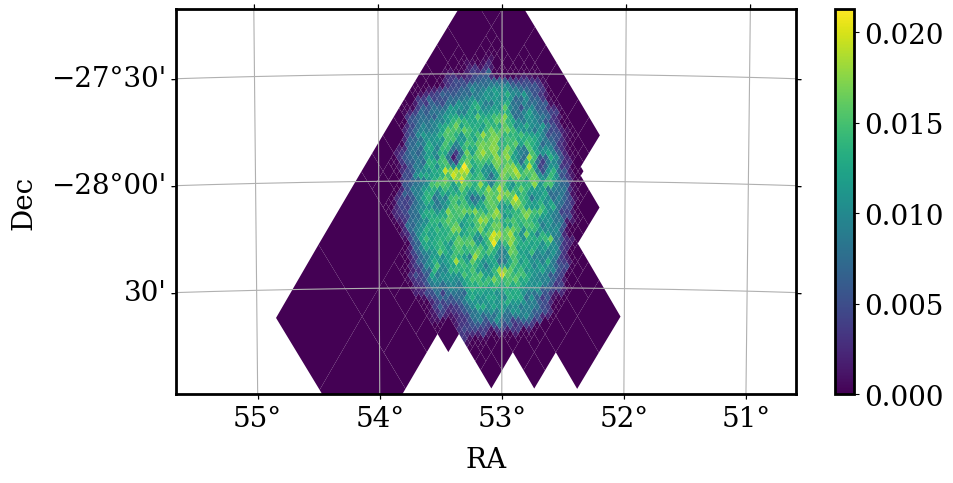

In [70]:
unit = u.arcsec * u.arcsec
pix_area = hp.order2pixarea(11, unit=unit)
hist, subtrees = skymap_histogram(ecdfs_cat, lambda df, pixel: len(df) , order=11)
df = subtrees[3]
print(df)
from hats.inspection.visualize_catalog import plot_healpix_map

# plot_healpix_map(hist, center=SkyCoord(ra=53.13*u.deg,dec= -28.10*u.deg),fov=2 * 3600*u.arcsec)
x= 0
y= -1
plot_healpix_map(subtrees[0], depth=subtrees[1], ipix=subtrees[2], center=SkyCoord(ra=53.13*u.deg,dec= -28.10*u.deg),fov=2 * 3600*u.arcsec)
# print(subtrees)

In [71]:
print(df)
print(df.iloc[np.nonzero(np.diff(df['Value'], prepend=np.nan))])

                     Value
_healpix_29               
2528558985024372736    0.0
2528560084536000512    0.0
...                    ...
2530279720721842176    0.0
2530284118768353280    0.0

[1877 rows x 1 columns]
                        Value
_healpix_29                  
2528558985024372736  0.000000
2528606470182797312  0.001036
...                       ...
2530269893836668928  0.000094
2530269962556145664  0.000000

[1739 rows x 1 columns]


(<Figure size 1000x500 with 2 Axes>, <WCSAxes: >)

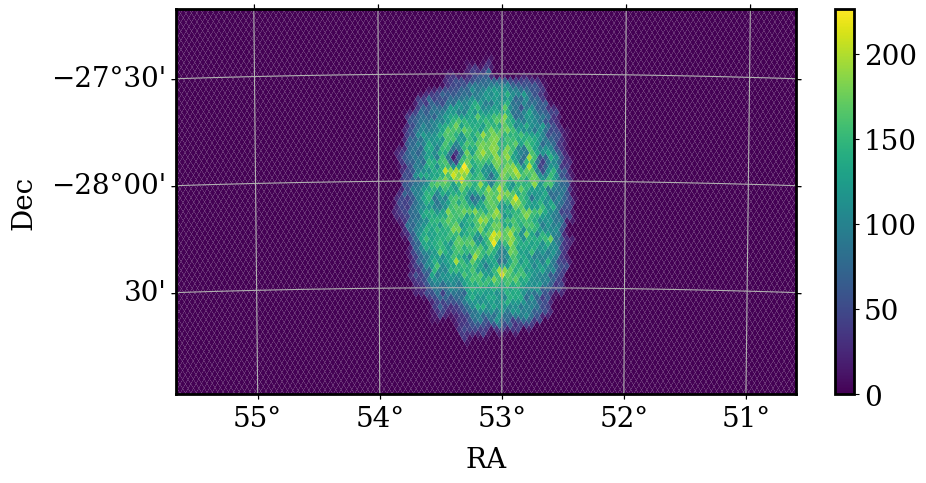

In [20]:
unit = u.arcsec * u.arcsec
pix_area = hp.order2pixarea(11, unit=unit)
hist, subtrees = skymap_histogram(ecdfs_cat, lambda df, pixel: len(df) , order=11)

from hats.inspection.visualize_catalog import plot_healpix_map

plot_healpix_map(hist, center=SkyCoord(ra=53.13*u.deg,dec= -28.10*u.deg),fov=2 * 3600*u.arcsec)
# plot_healpix_map(subtrees[0] / hp.order2pixarea(subtrees[1], unit=unit), depth=subtrees[1], ipix=subtrees[2], center=SkyCoord(ra=53.13*u.deg,dec= -28.10*u.deg),fov=2 * 3600*u.arcsec)
# print(subtrees)

In [24]:
# x= 125
# y= 135
# plot_healpix_map(np.log10(subtrees[0][x:y] * 4**subtrees[1][x:y]), depth=subtrees[1][x:y], ipix=subtrees[2][x:y], center=SkyCoord(ra=53.13*u.deg,dec= -28.10*u.deg),fov=2 * 3600*u.arcsec)
# # print(subtrees)
# print(subtrees[0][x:y],subtrees[1][x:y],subtrees[2][x:y])

In [21]:
# subtrees

In [68]:
# hist

In [11]:
def build_subtree(max_order, split_order, pixel_index, values):
    merger = MOMMerger("value", "equal", dtype=np.dtype(np.int32))
    builder = MOMBuilder(merger, max_norder=max_order, split_norder=split_order, thread_safe=True)
    avg_val = np.mean(values)
    out = builder.build_subtree(pixel_index, np.array(values, dtype=np.int32))
    if out == []:
        return [(split_order, np.array([pixel_index]), np.array([avg_val]))]
    return out

In [12]:
# dtype = fn(max_norder, np.arange(16, dtype=np.uint64)).dtype
# merger = MOMMerger("value", "equal", dtype=np.dtype(float))
# builder = MOMBuilder(merger, max_norder=11, split_norder=9, thread_safe=True)
# Order: 9, Pixel: 2299711: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
temp = build_subtree(11, 7, 143738, np.array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.33050807e-03, 5.55434730e-03, 2.25939551e-03, 6.40162062e-03,
       0.00000000e+00, 1.97697107e-03, 0.00000000e+00, 2.73010291e-03,
       4.98949843e-03, 4.89535695e-03, 4.14222511e-03, 4.89535695e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.88282959e-04, 0.00000000e+00, 0.00000000e+00,
       2.44767847e-03, 5.64848878e-03, 1.03555628e-03, 3.76565919e-03,
       0.00000000e+00, 2.82424439e-04, 0.00000000e+00, 2.44767847e-03,
       1.31798072e-03, 4.61293251e-03, 4.51879103e-03, 3.20081031e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.41414797e-05, 1.97697107e-03, 0.00000000e+00, 0.00000000e+00,
       4.14222511e-03, 3.95394215e-03, 1.50626368e-03, 4.14222511e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.67151771e-03, 9.41414797e-05, 4.80121547e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.41414797e-05, 1.50626368e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]))
# print(build_subtree(11, 9, 2299711, np.array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])))
print(temp)
subtrees = produce_subtree_skymap([temp])
print(subtrees)
plot_healpix_map(subtrees[0], depth=subtrees[1], ipix=subtrees[2], center=SkyCoord(ra=52.5*u.deg,dec= -28.80*u.deg),fov=1 * 3600*u.arcsec)

[(7, array([143738]), array([0.00038135]))]
(array([0.00038135]), array([7]), array([143738]))


NameError: name 'plot_healpix_map' is not defined

(<Figure size 1000x500 with 2 Axes>, <WCSAxes: >)

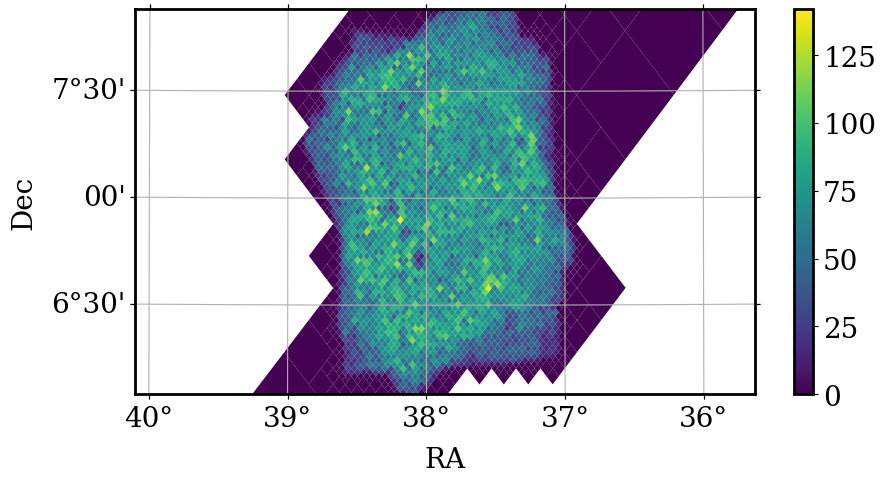

In [11]:
fields = {
    "ECDFS": (53.13, -28.10),  # Extended Chandra Deep Field South
    "EDFS": (59.10, -48.73),  # Euclid Deep Field South
    "Rubin_SV_38_7": (37.86, 6.98),  # Low Ecliptic Latitude Field
    "Rubin_SV_95_-25": (95.00, -25.00),  # Low Galactic Latitude Field
    "47_Tuc": (6.02, -72.08),  # 47 Tuc Globular Cluster
    "Fornax_dSph": (40.00, -34.45)  # Fornax Dwarf Spheroidal Galaxy
}
radius_arcsec = 2 * 3600  
cones = {name: ConeSearch(ra=ra, dec=dec, radius_arcsec=radius_arcsec) for name, (ra, dec) in fields.items()}
temp_cat = object_cat.search(cones['Rubin_SV_38_7'])
temp_cat = temp_cat[temp_cat['i_sizeExtendedness'] > 0.5] 
hist, subtrees = skymap_histogram(temp_cat, lambda df, pixel: len(df) , order=11)
plot_healpix_map(subtrees[0], depth=subtrees[1], ipix=subtrees[2], center=SkyCoord(ra=37.865017*u.deg,dec= 6.982205*u.deg),fov=2 * 3600*u.arcsec)

(<Figure size 1000x500 with 2 Axes>, <WCSAxes: >)

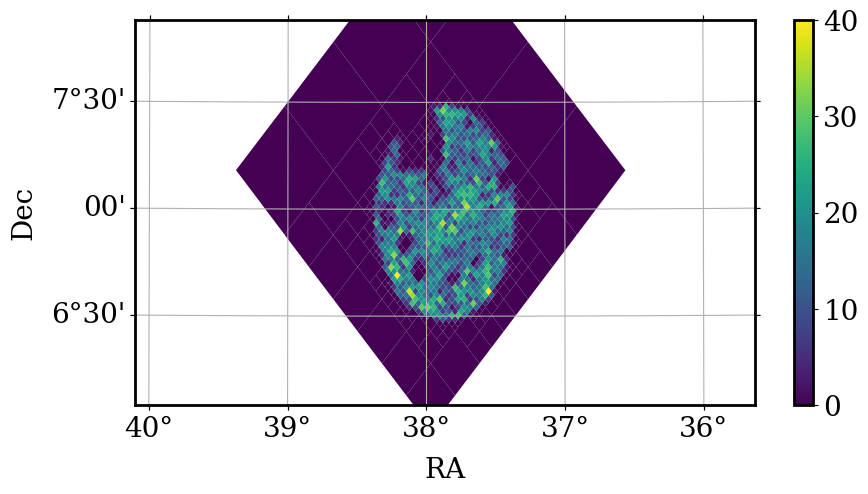

In [10]:
from astropy.io import fits
from astropy.table import Table
from hats.inspection.visualize_catalog import plot_healpix_map

table = Table.read('wl_pz_shear.fits')
df = table.to_pandas()
hat = lsdb.from_dataframe(df, ra_column='coord_ra', dec_column='coord_dec')
hist, subtrees = skymap_histogram(hat, lambda df, pixel: len(df) , order=11)
plot_healpix_map(subtrees[0], depth=subtrees[1], ipix=subtrees[2], center=SkyCoord(ra=37.865017*u.deg,dec= 6.982205*u.deg),fov=2 * 3600*u.arcsec)
